In [1]:
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions

import matplotlib.pyplot as plt

In [4]:

image_size = (299, 299)
batch_size = 32

train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages//train",
    validation_split=0.3,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C://Users//mhalama//Desktop//DATA_SET//PetImages//test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

normalized_train_ds = train_ds.map(lambda x, y: (tf.keras.applications.xception.preprocess_input(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.keras.applications.xception.preprocess_input(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (tf.keras.applications.xception.preprocess_input(x), y))


base_model = keras.applications.Xception(
    weights="imagenet",
    input_shape=(299, 299, 3),
    include_top=False
)


base_model.trainable = False
inputs = keras.Input(shape=(299, 299, 3))
# pretreied_input = tf.keras.applications.xception.preprocess_input(inputs)
# scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
# x = scale_layer(pretreied_input)
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)


model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9, nesterov=False),
              metrics=['accuracy'])


history = model.fit(normalized_train_ds, epochs=10, validation_data=normalized_val_ds)

# y_pred = model.predict(x_test)

# print(confusion_matrix(x_test, y_pred))

Found 20567 files belonging to 2 classes.
Using 14397 files for training.
Using 6170 files for validation.
Found 2855 files belonging to 2 classes.
Epoch 1/10
450/450 [==============================] - 3312s 7s/step - loss: 0.0299 - accuracy: 0.9922 - val_loss: 0.0190 - val_accuracy: 0.9942
Epoch 2/10
450/450 [==============================] - 3252s 7s/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.0174 - val_accuracy: 0.9943
Epoch 3/10
450/450 [==============================] - 3255s 7s/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0171 - val_accuracy: 0.9945
Epoch 4/10
450/450 [==============================] - 3269s 7s/step - loss: 0.0121 - accuracy: 0.9969 - val_loss: 0.0176 - val_accuracy: 0.9940
Epoch 5/10
450/450 [==============================] - 3259s 7s/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.0177 - val_accuracy: 0.9938
Epoch 6/10
450/450 [==============================] - 3276s 7s/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 0.0178 - val_accur

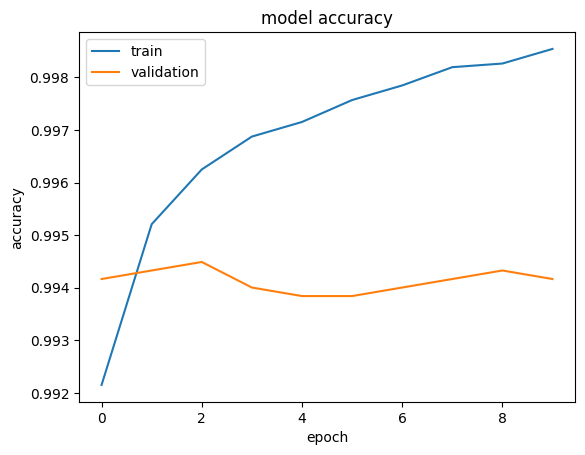

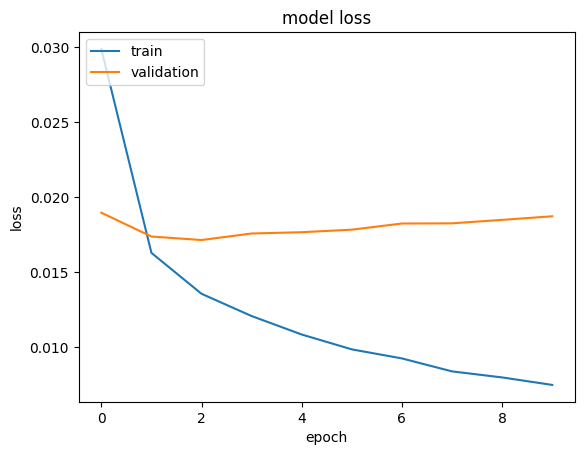

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()